In [1]:
from bufkit import ingest, sounding
from bufkit.util import units

In [2]:
# Ingest model data
bufr_file = ingest('KFLG', 'GFS')

In [3]:
# Get sounding data from file
df = sounding(bufr_file)
df

,STID,STNM,TIME,SLAT,SLON,SELV,STIM,SHOW,LIFT,SWET,...,LCLP,PWAT,TOTL,CAPE,LCLT,CINS,EQLV,LFCT,BRCH,PROFILE
0,KFLG,723755,2024-01-26 06:00:00,35.13,-111.67,2137.0,0,NaN,1.94,NaN,...,742.17,4.66,NaN,0.00,267.68,0.00,NaN,NaN,0.00,PRES TMPC TMWC DWPC THTE ...
1,KFLG,723755,2024-01-26 07:00:00,35.13,-111.67,2137.0,1,NaN,2.58,NaN,...,747.04,4.28,NaN,0.00,267.38,0.00,NaN,NaN,0.00,PRES TMPC TMWC DWPC THTE ...
2,KFLG,723755,2024-01-26 08:00:00,35.13,-111.67,2137.0,2,NaN,3.27,NaN,...,752.04,4.08,NaN,0.00,266.49,0.00,NaN,NaN,0.00,PRES TMPC TMWC DWPC THTE ...
3,KFLG,723755,2024-01-26 09:00:00,35.13,-111.67,2137.0,3,NaN,4.48,NaN,...,754.86,4.13,NaN,0.00,265.35,0.00,NaN,NaN,0.00,PRES TMPC TMWC DWPC THTE ...
4,KFLG,723755,2024-01-26 10:00:00,35.13,-111.67,2137.0,4,NaN,5.46,NaN,...,750.39,4.13,NaN,0.00,264.95,0.00,NaN,NaN,0.00,PRES TMPC TMWC DWPC THTE ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,KFLG,723755,2024-02-02 03:00:00,35.13,-111.67,2137.0,165,NaN,2.04,NaN,...,742.54,11.31,NaN,0.28,274.45,-0.89,697.56,731.14,0.01,PRES TMPC TMWC DWPC THTE ...
136,KFLG,723755,2024-02-02 06:00:00,35.13,-111.67,2137.0,168,NaN,2.38,NaN,...,745.90,11.28,NaN,15.12,274.71,-0.89,560.58,737.01,0.75,PRES TMPC TMWC DWPC THTE ...
137,KFLG,723755,2024-02-02 09:00:00,35.13,-111.67,2137.0,171,NaN,3.11,NaN,...,753.81,10.08,NaN,32.79,274.69,-0.87,598.27,716.55,1.52,PRES TMPC TMWC DWPC THTE ...
138,KFLG,723755,2024-02-02 12:00:00,35.13,-111.67,2137.0,174,NaN,5.43,NaN,...,749.23,9.87,NaN,17.75,273.38,-0.88,609.25,730.02,1.45,PRES TMPC TMWC DWPC THTE ...


In [4]:
# Get sounding profile from the first timestep
station, time = df.STID[0], df.TIME[0]
profile = df.PROFILE[0]
profile.head()

,PRES,TMPC,TMWC,DWPC,THTE,DRCT,SKNT,OMEG,HGHT
0,771.9,-2.46,-3.46,-4.96,301.75,323.13,8.75,0.65,2138.03
1,767.9,-1.96,-3.20,-5.03,302.76,324.74,13.81,0.97,2179.32
2,763.5,-1.96,-3.23,-5.10,303.26,325.92,15.96,1.09,2225.03
3,758.6,-2.16,-3.44,-5.34,303.49,327.38,17.31,1.16,2276.23
4,753.0,-2.56,-3.79,-5.64,303.54,328.51,18.24,1.21,2335.08


In [5]:
import numpy as np
import metpy.calc as mpcalc
import matplotlib.pyplot as plt
from metpy.plots import SkewT

In [6]:
# Get data values and apply units
z = profile.HGHT.values * units('HGHT')
p = profile.PRES.values * units('PRES')
T = profile.TMPC.values * units('TMPC')
Tw = profile.TMWC.values * units('TMWC')
Td = profile.DWPC.values * units('DWPC')
wind_dir = profile.DRCT.values * units('DRCT')
wind_speed = profile.SKNT.values * units('SKNT')
u, v = mpcalc.wind_components(wind_speed, wind_dir)

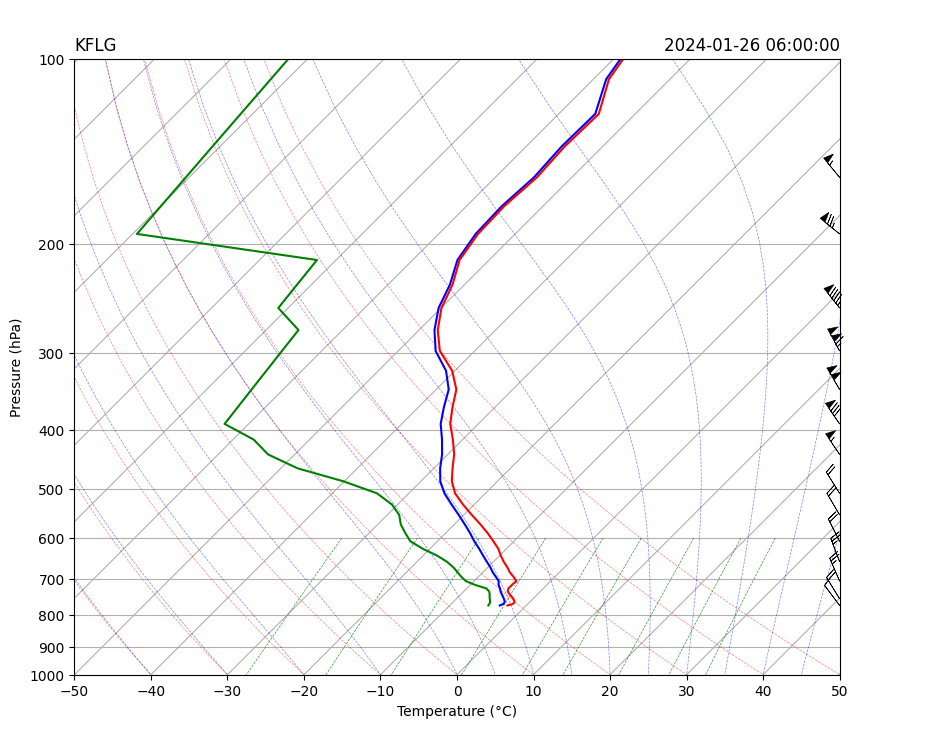

In [7]:
# Setup skew T plot
fig = plt.figure(figsize=(12, 8))
skew = SkewT(fig, rotation=45)

# Plot temperature, wet-bulb, and dewpoint
skew.plot(p, Tw, 'b', linewidth=1.5)
skew.plot(p, Td, 'g', linewidth=1.5)
skew.plot(p, T, 'r', linewidth=1.5)

# Plot wind barb every 50 mb from 1000 to 150 mb
interval = np.arange(150, 1000, 50) * units('PRES')
ix = mpcalc.resample_nn_1d(p, interval)
skew.plot_barbs(p[ix], u[ix], v[ix], length=6, linewidth=0.5)

# Add dry and moist adiabats, as well as mixing ratio
skew.plot_dry_adiabats(color='k', linewidth=0.5)
skew.plot_moist_adiabats(color='k', linewidth=0.5)
skew.plot_mixing_lines(color='k', linewidth=0.5)

# Set axis range
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-50, 50)

# Label axis
skew.ax.set_xlabel('Temperature (°C)')
skew.ax.set_ylabel('Pressure (hPa)')

# Set plot headers
skew.ax.set_title(station, loc='left')
skew.ax.set_title(time, loc='right')

# Show the plot
plt.show()